In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import h5py

In [12]:
dir = "../data"
data_files = os.listdir(dir)
data_files = [s for s in data_files if "out_" in s]
h5_files = [h5py.File(dir + '/' + f) for f in data_files]
walltimes = [f["walltimes"][()] for f in h5_files]
data_files

['out_8.h5', 'out_16.h5', 'out_2.h5', 'out_1.h5', 'out_4.h5']

In [9]:
def avg_time(wt):
    avg_time = np.mean(wt)
    std_time = np.std(wt)
    return (avg_time, std_time)

In [10]:
time_stats = [avg_time(wt) for wt in walltimes]
avg_times = np.array([tup[0] for tup in time_stats])
std_times = np.array([tup[1] for tup in time_stats])

In [13]:
# get digits from the filenames.
def get_all_digits(strn):
    digit_str = []
    for ch in strn:
        if ch.isdigit():
            digit_str.append(ch)
    return ''.join(digit_str)

num_nodes = np.array([int(get_all_digits(strn.replace('.h5', ''))) for strn in data_files])
num_nodes

array([ 8, 16,  2,  1,  4])

In [14]:
# Fit a line to the data in the chosen log scale. 
linreg_result = linregress(np.log2(num_nodes), np.log10(avg_times))
fit_x = np.linspace(np.min(num_nodes), np.max(num_nodes), num=50)
alpha = linreg_result.slope
beta = linreg_result.intercept
fit_y = 10.0 ** np.log2(2.0 ** beta * fit_x ** alpha)
print(linreg_result.slope)

-0.3001696871998504


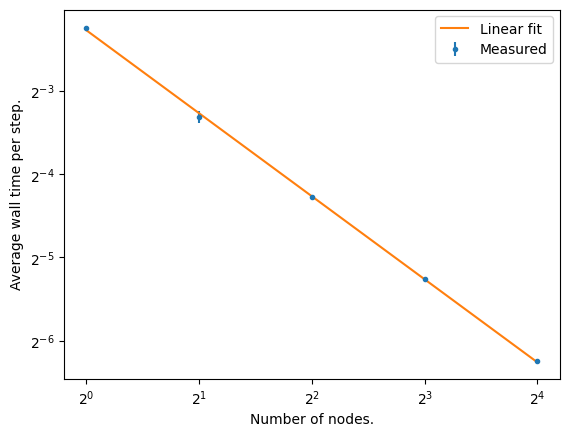

In [15]:
fig, ax = plt.subplots()
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=2)
ax.errorbar(num_nodes, avg_times, yerr=std_times, \
            linestyle='', marker='.', label="Measured")
ax.plot(fit_x, fit_y, label="Linear fit")
ax.set_xlabel("Number of nodes.")
ax.set_ylabel("Average wall time per step.")
ax.legend()